In [4]:
#better time flow
import pandas as pd
import numpy as np
import random
from final_processing_maybe import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras

normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [5]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [6]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# model = Sequential()
# model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='LeakyReLU'))
# model.add(Dense(3, activation='LeakyReLU')) # size to compress to
# model.add(Dense(10, activation='LeakyReLU'))
# model.add(Dense(processed_normal.values.shape[1])) # Multiple output neurons
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)

model = keras.models.load_model("better_time")

In [7]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-27 03:19:23.188210: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-27 03:19:23.220743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.16849128518937603
0.16809630511696905


In [8]:
pro_values = processed_attack.values
pred_attack = model.predict(pro_values)

<AxesSubplot:>

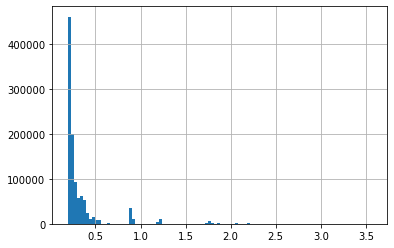

In [9]:
score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],pro_values[index])))

attack_df['score'] = score_list
attack_df['score'].hist(bins = 100)

0.8924475821462237

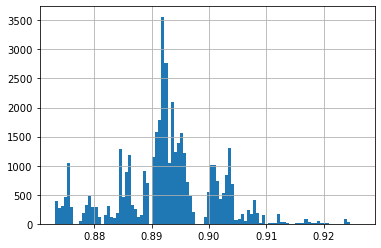

In [10]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].median()

0.9175963750325269

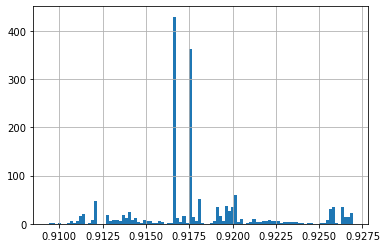

In [11]:
wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[15]:


wordpress['score'].hist(bins = 100)


# In[20]:


wordpress['score'].median()

In [10]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.327108
std            0.258978
min            0.191742
25%            0.215911
50%            0.232858
75%            0.323848
max            3.568527
Name: score, dtype: object

In [11]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         0.892603
std          0.008431
min          0.873141
25%          0.888844
50%          0.892448
75%          0.896196
max          0.926237
Name: score, dtype: object

In [12]:
attack_df['score'].quantile(0.97)

0.9176013024569585

In [13]:
pro_values = processed_normal.values
pred_normal = model.predict(pro_values)

<AxesSubplot:>

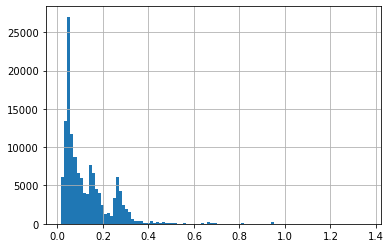

In [15]:
score_list = []
for index, x in enumerate(pred_normal):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_normal[index],pro_values[index])))

normal_df['score'] = score_list
normal_df['score'].hist(bins = 100)